In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objs as go

In [4]:
df1 = pd.read_csv('LA_Listings.csv',  encoding="CP866", low_memory=False)

In [225]:
print('Rows' : df1.shape[1])
print('')

(59865, 35)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59865 entries, 0 to 59864
Data columns (total 35 columns):
Listing ID                     59865 non-null int64
Name                           59859 non-null object
Host ID                        59865 non-null int64
Host Name                      59846 non-null object
Host Response Rate             25624 non-null float64
Host Is Superhost              59865 non-null bool
Host total listings count      59851 non-null float64
Street                         31148 non-null object
City                           59865 non-null object
Neighbourhood cleansed         59865 non-null object
State                          59865 non-null object
Country                        59865 non-null object
latitude                       59865 non-null object
longitude                      59865 non-null float64
Property type                  59865 non-null object
Room type                      59865 non-null object
Accommodates                   31148 non-nul

In [244]:
room_type = df1[['Host ID','Room type']].groupby('Room type').count()
labels = room_type.index
amount = room_type.values[:,0]

fig = px.pie(values=amount, names=labels, title='Room type', hole=.3, 
             width=500, height=500)
fig.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
#fig.update_traces(textposition='inside', textfont_size=10)
fig.show()

In [215]:
data_reviews = df1.loc[(df1['Number of reviews']>2)]
data_reviews = data_reviews[data_reviews['Review Scores Rating']>0]
data_reviews['Review Scores Rating'].head()

1      95
9      95
13     84
18    100
20     96
Name: Review Scores Rating, dtype: int64

In [220]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df1[df1['Review Scores Rating']>0]['Review Scores Rating'], name='Number of reviews => 0'))
fig.add_trace(go.Histogram(x=data_reviews['Review Scores Rating'], name='Number of reviews > 2'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [204]:
room_type.values[:,0]

array([36046,   187, 20861,  2771], dtype=int64)

In [6]:
colums_num = ['Host Is Superhost', 'Host total listings count', 'Price', 'Minimum nights', 
              'Availability 365', 'Number of reviews', 'Review Scores Rating',
              'Review Scores Value', 'Reviews per month']

In [45]:
df1_group = df1.groupby('Host ID')[colums_num].mean()

### Распределение количества отзывов

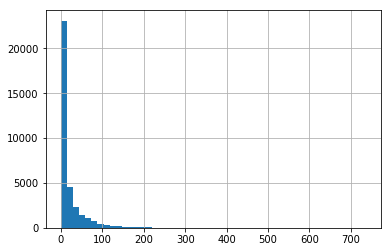

In [46]:
df1_group['Number of reviews'].hist(bins=50)

In [84]:
quan_nr = df1_group['Number of reviews'].quantile(q=[0.2, 0.25, 0.5, 0.8, 0.90])
quan_nr

0.20     0.000000
0.25     1.000000
0.50     6.000000
0.80    31.000000
0.90    58.333333
Name: Number of reviews, dtype: float64

In [53]:
def quan_num_rev(x, d):
    if x == d[0.2]:
        return f'reviews = {d[0.2]}'
    elif x <= d[0.5]:
        return f'{d[0.2]}< reviews <= {d[0.5]}'
    elif x <= d[0.8]: 
        return f'{d[0.5]}< reviews <= {d[0.8]}'
    else:
        return f'reviews > {d[0.8]}'

In [54]:
data1 = df1_group[['Number of reviews', 'Review Scores Rating', 'Price']]
data1['category_reviews'] = df1_group['Number of reviews'].apply(quan_num_rev, args=(quan_nr,))
data1.head()

C:\WPy64-3720\python-3.7.2.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Number of reviews,Review Scores Rating,Price,category_reviews
Host ID,,,,
59,25.0,98.0,80.0,6.0< reviews <= 31.0
521,2.0,80.0,122.0,0.0< reviews <= 6.0
767,1.0,80.0,168.0,0.0< reviews <= 6.0
1158,2.0,100.0,120.0,0.0< reviews <= 6.0
2633,0.0,0.0,85.0,reviews = 0.0


In [61]:
data1 = data1.sort_values(by='Number of reviews')
data1.head()

,Number of reviews,Review Scores Rating,Price,category_reviews
Host ID,,,,
341477095,0.0,0.0,60.0,reviews = 0.0
32157888,0.0,0.0,50.0,reviews = 0.0
64191790,0.0,0.0,40.0,reviews = 0.0
64195911,0.0,0.0,50.0,reviews = 0.0
64207917,0.0,0.0,60.0,reviews = 0.0


In [66]:
amount.sort_values()

category_reviews
reviews > 31.0           6892
reviews = 0.0            7591
6.0< reviews <= 31.0     9910
0.0< reviews <= 6.0     10464
Name: Number of reviews, dtype: int64

In [247]:
labels = data1.groupby('category_reviews')['Number of reviews'].count().keys()
amount = data1.groupby('category_reviews')['Number of reviews'].count()

fig = px.pie(values=amount, names=labels, title='Reviews', hole=.3, 
             width=700, height=600)

fig.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')

fig.show()

In [95]:
quan_score_val = df1_group['Review Scores Rating'].quantile(q=[0.2, 0.25, 0.6, 0.75, 0.8, 0.90])
quan_score_val

0.20      0.0
0.25      0.0
0.60     50.0
0.75     95.0
0.80     97.0
0.90    100.0
Name: Review Scores Rating, dtype: float64

In [119]:
def quan_val_rev(x, d):
    if x == d[0.2]:
        return f'{int(d[0.2])}'
    elif x <= d[0.6]:
        return f'{int(d[0.2])}-{int(d[0.6])}'
    elif x < d[0.75]: 
        return f'{int(d[0.6])}-{int(d[0.75])}'
    else:
        return f'{int(d[0.75])}-{int(d[0.9])}'

In [120]:
data1['category_score'] = data1['Review Scores Rating'].apply(quan_val_rev, args=(quan_score_val,))
data1.head()

,Number of reviews,Review Scores Rating,Price,category_reviews,category_score
Host ID,,,,,
341477095,0.0,0.0,60.0,reviews = 0.0,0
32157888,0.0,0.0,50.0,reviews = 0.0,0
64191790,0.0,0.0,40.0,reviews = 0.0,0
64195911,0.0,0.0,50.0,reviews = 0.0,0
64207917,0.0,0.0,60.0,reviews = 0.0,0


In [246]:
labels = data1.groupby('category_score')['Review Scores Rating'].count().keys()
amount = data1.groupby('category_score')['Review Scores Rating'].count()

fig = px.pie(values=amount, names=labels, title='Score', hole=.3, width=500, height=500)

fig.update_layout(uniformtext_minsize=16, uniformtext_mode='hide')
fig.show()

In [123]:
quan_score_pr = df1_group['Price'].quantile(q=[0.2, 0.25, 0.6, 0.75, 0.8, 0.90])
quan_score_pr

0.20     65.0
0.25     72.5
0.60    125.0
0.75    175.0
0.80    199.0
0.90    299.0
Name: Price, dtype: float64

In [181]:
def quan_price_rev(x, d):
    if x <= d[0.2]:
        return f'< {d[0.2]}$'
    elif x < d[0.6]:
        return f'{d[0.2]}-{d[0.6]}$'
    elif x < d[0.9]: 
        return f'{d[0.6]}-{d[0.9]}$'
    else:
        return f'> {d[0.9]}$'

In [182]:
data1['price_score'] = data1['Price'].apply(quan_price_rev, args=(quan_score_pr,))
data1.head()

,Number of reviews,Review Scores Rating,Price,category_reviews,category_score,price_score
Host ID,,,,,,
341477095,0.0,0.0,60.0,reviews = 0.0,0,< 65.0$
32157888,0.0,0.0,50.0,reviews = 0.0,0,< 65.0$
64191790,0.0,0.0,40.0,reviews = 0.0,0,< 65.0$
64195911,0.0,0.0,50.0,reviews = 0.0,0,< 65.0$
64207917,0.0,0.0,60.0,reviews = 0.0,0,< 65.0$


In [183]:
labels = data1.groupby('price_score')['price_score'].count().keys()
amount = data1.groupby('price_score')['price_score'].count()

fig = px.pie(values=amount, names=labels, title='Price', hole=.3, 
             width=500, height=500)
fig.show()

Что выбирать для сегментации?
1) Количество отзывов. 
Параметр хороший. Несёт хотя бы какую-то информацию о количестве пользователей. Минус в том(как я считаю), что у долгосрочных хостов скорее всего меньше отзывов, так как поток людей меньше.
2) Рейтинг.
Как видно на диаграммах, значения бросаются в крайности (либо очень плохой, либо очень хороший). Как вариант можно скомбинировать с 1) признаком
3) Кол-во удобств.
В принципе неплохой параметр, который говорит о заботе владельца о клиенте. Как вариант можно вручную задать веса для каждого конкретного "удобства" и посчитать суммарный параметр
4) Мин/макс кол-во ночей/Availability 365
В комбинации можно сделать некий показатель того, сдаёт ли хост жильё надолго или нет.
5) Супер хост
Комбинация параметров, что нам недоступна. Можно включить в какой-то признак с весом или рассматривать как отдельный.


money - price

freqiency - occupancy

Recency - 'Calendar last scraped'

In [147]:
df1['Last scraped'] = pd.to_datetime(df1['Calendar last scraped'])

In [148]:
df_last_scraped = df1.groupby('Host ID')['Last scraped'].max()

In [153]:
df_last_scraped.isnull().sum()/df_last_scraped.shape[0]

0.40479674097024987